In [2]:
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Channels

In [3]:
df_ch = pd.read_csv("../Youniverse/df_channels_en.tsv", compression="infer", sep="\t")
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])

In [4]:
print('Length:', len(df_ch))
df_ch.head()

Length: 136470


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [5]:
missing_columns = df_ch.columns[df_ch.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_ch[df_ch.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')



Columns with missing values:  ['category_cc', 'join_date', 'name_cc']
139 rows wih missing values


In [6]:
df_ch = df_ch.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_ch))

Length after dropping missing values: 136331


In [7]:
df_ch['join_year'] = df_ch['join_date'].apply(lambda x: int(x.year))

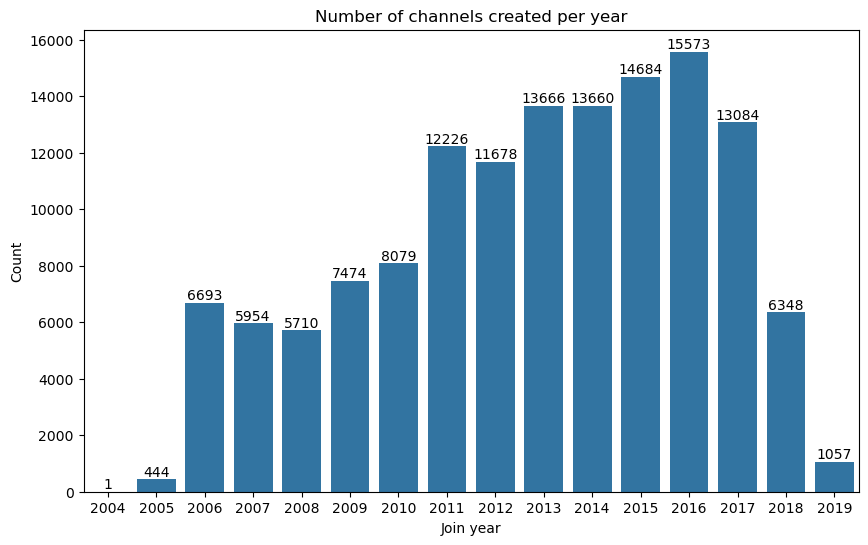

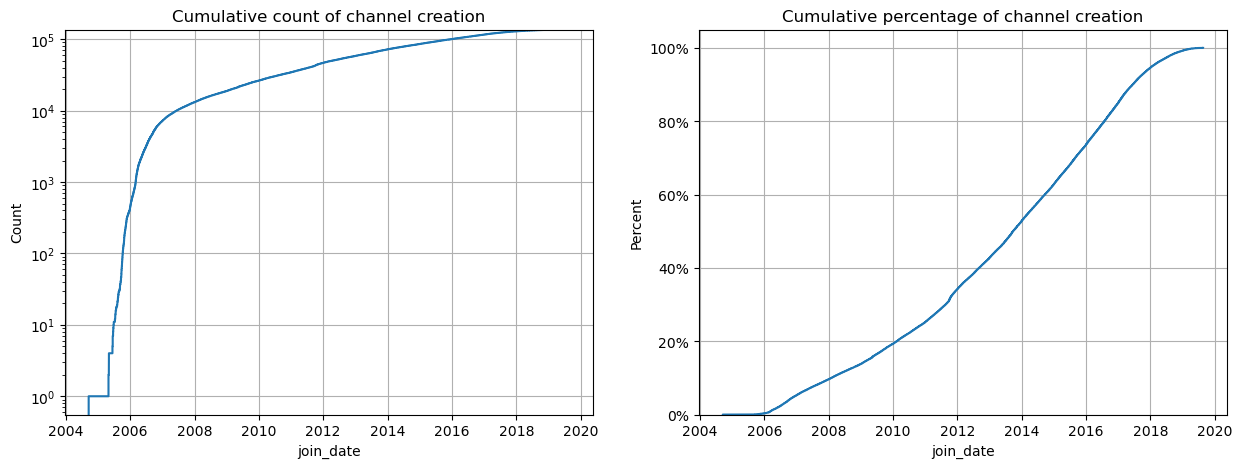

In [8]:
from matplotlib.ticker import PercentFormatter

year_count = df_ch.groupby('join_year').apply(len, include_groups=False)
plt.figure(figsize=(10,6))

barplot = sns.barplot(x=year_count.index, y=year_count.values)
for container in barplot.containers :
    barplot.bar_label(container, label_type='edge')
plt.xlabel('Join year')
plt.ylabel('Count')
plt.title('Number of channels created per year');
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.ecdfplot(data=df_ch, x='join_date', stat='count', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Cumulative count of channel creation')
ax[0].grid()
sns.ecdfplot(data=df_ch, x='join_date', stat='percent', ax=ax[1])
ax[1].yaxis.set_major_formatter(PercentFormatter())
ax[1].set_title('Cumulative percentage of channel creation')
ax[1].grid()

Text(0.5, 1.0, 'Proportion of educational channels created per year')

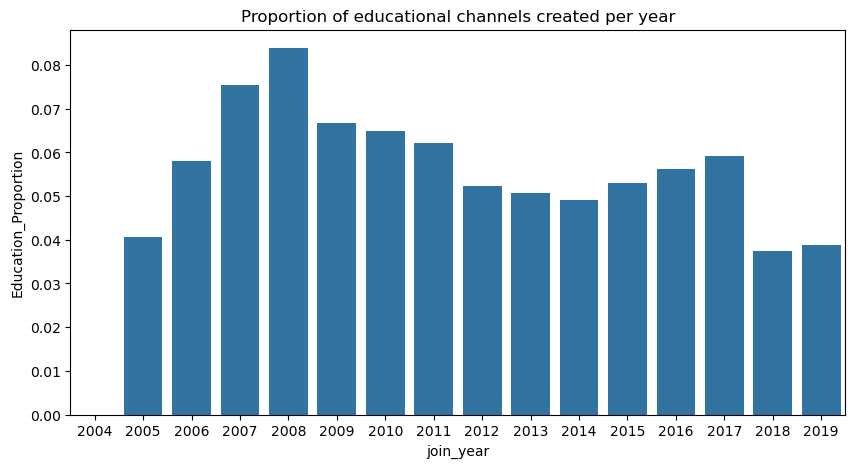

In [118]:
channel_created_per_year = df_ch.groupby('join_year').size()

channel_created_per_year_per_category = df_ch.groupby(['join_year', 'category_cc']).size().unstack(fill_value=0)

channel_created_per_year_per_category['Education_Proportion'] = (channel_created_per_year_per_category['Education'] / channel_created_per_year)

plt.figure(figsize=(10, 5))
sns.barplot(data=channel_created_per_year_per_category, x='join_year', y='Education_Proportion')
plt.title('Proportion of educational channels created per year')

# Time Series

In [9]:
df_sb_f = pd.read_csv("../Youniverse/df_timeseries_en.tsv", compression="infer", sep="\t")

In [10]:
print('Length:', len(df_sb_f))
df_sb_f.head()

Length: 18872499


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [11]:
missing_columns = df_sb_f.columns[df_sb_f.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_sb_f[df_sb_f.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')

Columns with missing values:  ['category']
20584 rows wih missing values


In [12]:
df_sb = df_sb_f.copy()

In [13]:
number_channels = len(df_sb['channel'].value_counts())
print('Number of channels:', number_channels)

Number of channels: 133516


In [ ]:
df_sb["datetime"] = pd.to_datetime(df_sb["datetime"])
df_sb['year'] = df_sb['datetime'].dt.year

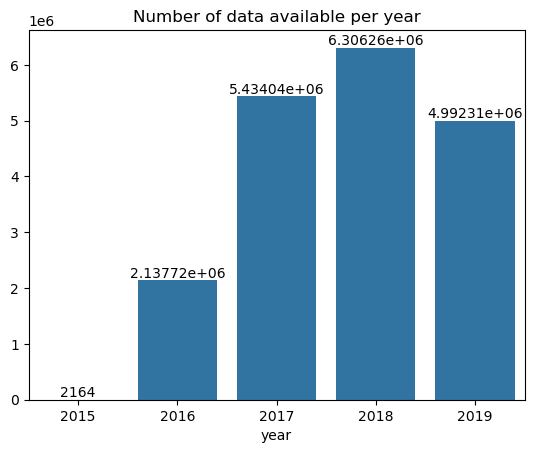

In [15]:
nb_data_per_year = df_sb.value_counts('year')
barplot = sns.barplot(x=nb_data_per_year.index, y=nb_data_per_year.values)
for container in barplot.containers :
    barplot.bar_label(container, label_type='edge')
plt.title('Number of data available per year');

Text(0.5, 1.0, 'Number of videos per year')

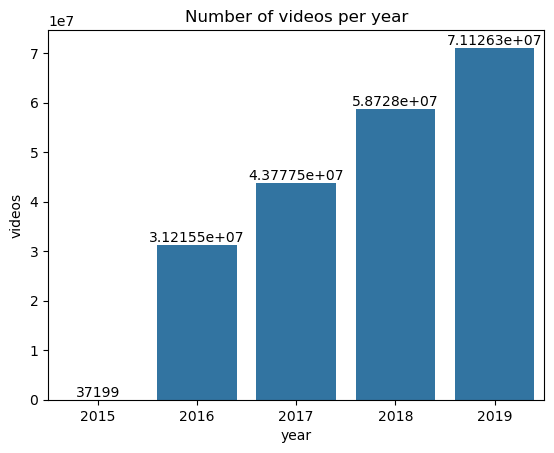

In [16]:
videos_per_year = (
    df_sb.groupby(['year', 'channel'], as_index=False)['videos']
    .max()                          # Get the max videos per channel per year
    .groupby('year', as_index=False)['videos']
    .sum()                          # Sum across channels for each year
    .set_index('year')['videos']    # Set 'year' as index for convenience
)

barplot = sns.barplot(videos_per_year)
for container in barplot.containers :
    barplot.bar_label(container, label_type='edge')
plt.title('Number of videos per year')

# Videos

In [17]:
df_vd_f = pd.read_feather("../Youniverse/yt_metadata_helper.feather")

In [18]:
df_vd_f.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


In [61]:
import json

def read_first_line(file_path):
    """
    Reads and returns the first line of a JSONL file as a JSON object.

    Parameters:
    - file_path: str, path to the JSONL file

    Returns:
    - dict or None: The parsed JSON object from the first line, or None if the file is empty
    """
    with open(file_path, 'r') as file:
        # Read the first line
        first_line = file.readline().strip()
        
        # Parse the line as JSON if it's not empty
        if first_line:
            return json.loads(first_line)
        else:
            return None

# Usage example
file_path = '../Youniverse/yt_metadata_en.jsonl'
first_line_data = read_first_line(file_path)
print("First line of the file:", first_line_data)
first_line_data = pd.json_normalize(first_line_data)
first_line_data

First line of the file: {'categories': 'Film & Animation', 'channel_id': 'UCzWrhkg9eK5I8Bm3HfV-unA', 'crawl_date': '2019-10-31 20:19:26.270363', 'description': 'Lego City Police Lego Firetruck Cartoons about Lego City Movie for kids with a nice long video to keep the kids entertained while learning and having fun with the Lego City characters from Lego City undercover. Thanks for watching!', 'dislike_count': 1.0, 'display_id': 'SBqSc91Hn9g', 'duration': 1159, 'like_count': 8.0, 'tags': 'lego city,lego police,lego city police,lego city episodes,videos de lego city,lego policia,lego bomberos,lego fire truck,lego firetruck,lego police chase,lego robbers,lego cartoons,lego movies,lego videos for kids', 'title': 'Lego City Police Lego Firetruck Cartoons about Lego City Movie for kids Episodes', 'upload_date': '2016-09-28 00:00:00', 'view_count': 1057.0}


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.270363,Lego City Police Lego Firetruck Cartoons about...,1.0,SBqSc91Hn9g,1159,8.0,"lego city,lego police,lego city police,lego ci...",Lego City Police Lego Firetruck Cartoons about...,2016-09-28 00:00:00,1057.0


In [19]:
print('Length:', len(df_vd_f))

Length: 72924794


In [33]:
missing_columns = df_vd_f.columns[df_vd_f.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_vd_f[df_vd_f.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')

Columns with missing values:  ['dislike_count', 'like_count', 'view_count']
1631458 rows wih missing values


In [34]:
df_vd = df_vd_f.copy()

In [35]:
df_vd = df_vd.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_vd))

Length after dropping missing values: 71293336


Text(0.5, 1.0, 'Cumulative video count')

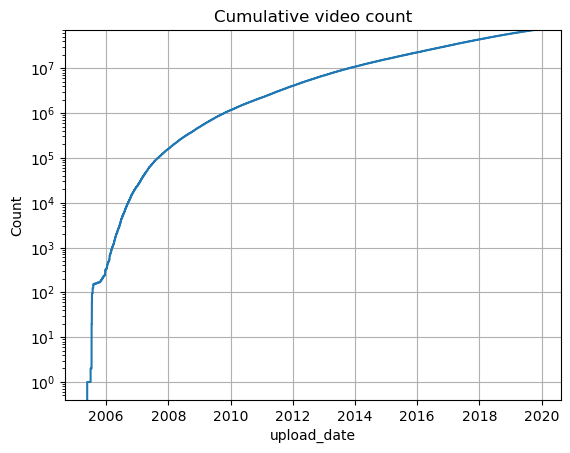

In [64]:
sns.ecdfplot(data=df_vd, x='upload_date', stat='count')
plt.yscale('log')
plt.grid()
plt.title('Cumulative video count')

In [65]:
df_vd['year'] = df_vd['upload_date'].dt.year

In [119]:
videos_per_year = df_vd.groupby('year').size()

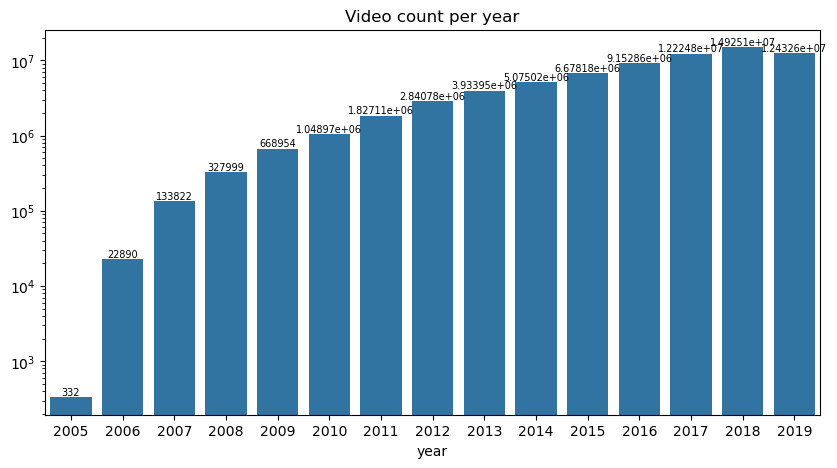

In [127]:
plt.figure(figsize=(10,5))
barplot = sns.barplot(x=videos_per_year.index, y=videos_per_year.values)
for container in barplot.containers :
    barplot.bar_label(container, label_type='edge', fontsize=7)
plt.title('Video count per year')
plt.yscale('log')

Text(0.5, 1.0, 'Proportion of educational videos per year')

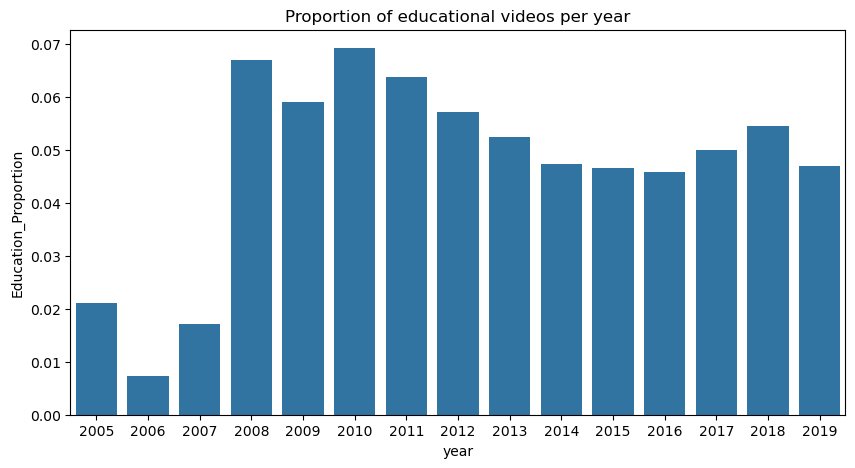

In [115]:
videos_per_year = df_vd.groupby('year').size()

videos_per_year_per_category = df_vd.groupby(['year', 'categories']).size().unstack(fill_value=0)

videos_per_year_per_category['Education_Proportion'] = (videos_per_year_per_category['Education'] / videos_per_year)

plt.figure(figsize=(10, 5))
sns.barplot(data=videos_per_year_per_category, x='year', y='Education_Proportion')
plt.title('Proportion of educational videos per year')

In [4]:
import json
import pandas as pd

def find_line_in_jsonl_with_pandas(file_path, target_line_number, chunk_size=1024):
    """
    Searches for a specific line in a JSONL file using Pandas and chunked reading.

    Parameters:
    - file_path: str, path to the JSONL file
    - target_line_number: int, the line number to retrieve (0-indexed)
    - chunk_size: int, the number of lines per chunk (default is 1024)

    Returns:
    - pd.Series or None: The row at the specified line as a Pandas Series, or None if not found
    """
    current_line_number = 0

    # Use Pandas to read the file in chunks
    for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
        # Check if the target line is within this chunk
        if current_line_number + len(chunk) > target_line_number:
            # Calculate the exact row index within the chunk
            within_chunk_index = target_line_number - current_line_number
            # Return the row as a Pandas Series
            return chunk.iloc[within_chunk_index]

        # Move to the next chunk
        current_line_number += len(chunk)

    # If the line is not found (out of bounds)
    return None

# Usage example
file_path = '../Youniverse/yt_metadata_en.jsonl'
target_line_number = 1000000  # Replace with the desired line number
result = find_line_in_jsonl_with_pandas(file_path, target_line_number)
print(result)


categories                                    Science & Technology
channel_id                                UCrUfjMyHTAMQ8_OnM2nJFlw
crawl_date                              2019-11-22 20:07:35.608354
description      http://manhattan-products.com/en-US/products/9...
dislike_count                                                  1.0
display_id                                             DKdAFfKUUks
duration                                                       583
like_count                                                     8.0
tags               KTrinh93,Manhattan,Stealth,Touch,Mouse,Wireless
title                         Manhattan Stealth Touch Mouse Review
upload_date                                    2012-08-29 00:00:00
view_count                                                     677
Name: 1000000, dtype: object
